# Rohi Hotel Project

### Import of required libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_excel('Material_Received.xlsx')

In [25]:
df.head(3)

,SR NO.,REQUISITION DATE,PRICE,CARPENTERS,PAINTERS,MASON,GYPSUM,PAYMENT
0,1,2017-10-01,"2,777.00",11.00,14.00,31.00,43.00,"31,988.26"
1,2,2017-10-02,"2,777.00",10.00,13.00,25.00,43.00,"31,988.26"
2,3,2017-10-03,"2,777.00",9.00,14.00,26.00,49.00,"31,988.26"


### Exploratory Data Analysis (EDA) & Drop of Unnecessary Columns

In [26]:
df.drop(['SR NO.'], axis =1, inplace = True)

In [27]:
df.head(3)

,REQUISITION DATE,PRICE,CARPENTERS,PAINTERS,MASON,GYPSUM,PAYMENT
0,2017-10-01,"2,777.00",11.00,14.00,31.00,43.00,"31,988.26"
1,2017-10-02,"2,777.00",10.00,13.00,25.00,43.00,"31,988.26"
2,2017-10-03,"2,777.00",9.00,14.00,26.00,49.00,"31,988.26"


In [28]:
df.drop(['REQUISITION DATE'], axis = 1, inplace = True)

In [29]:
df.head()

,PRICE,CARPENTERS,PAINTERS,MASON,GYPSUM,PAYMENT
0,"2,777.00",11.00,14.00,31.00,43.00,"31,988.26"
1,"2,777.00",10.00,13.00,25.00,43.00,"31,988.26"
2,"2,777.00",9.00,14.00,26.00,49.00,"31,988.26"
3,"2,777.00",9.00,13.00,28.00,48.00,"31,988.26"
4,"2,777.00",8.00,11.00,29.00,45.00,"31,988.26"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 6 columns):
PRICE         608 non-null float64
CARPENTERS    514 non-null float64
PAINTERS      514 non-null float64
MASON         515 non-null float64
GYPSUM        516 non-null float64
PAYMENT       608 non-null float64
dtypes: float64(6)
memory usage: 28.6 KB


In [31]:
df.isnull().sum(axis=0)

PRICE          0
CARPENTERS    94
PAINTERS      94
MASON         93
GYPSUM        92
PAYMENT        0
dtype: int64

### Treatment of Missing Values

In [32]:
df['CARPENTERS'].fillna(method = 'ffill', inplace = True)

In [33]:
df['PAINTERS'].fillna(method = 'bfill', inplace = True)

In [34]:
df['MASON'].fillna(method = 'ffill', inplace = True)

In [35]:
df.isnull().sum(axis=0)

PRICE          0
CARPENTERS     0
PAINTERS       0
MASON          0
GYPSUM        92
PAYMENT        0
dtype: int64

In [36]:
df['GYPSUM'].fillna(method='bfill', inplace=True)

In [37]:
df.isnull().sum(axis=0)

PRICE         0
CARPENTERS    0
PAINTERS      0
MASON         0
GYPSUM        0
PAYMENT       0
dtype: int64

In [38]:
df.describe()

,PRICE,CARPENTERS,PAINTERS,MASON,GYPSUM,PAYMENT
count,608.00,608.00,608.00,608.00,608.00,608.00
mean,"6,230.57",20.21,19.27,24.70,22.64,"47,626.11"
std,"5,366.83",16.44,20.71,17.54,10.15,"35,043.95"
min,792.27,0.00,0.00,0.00,0.00,"4,791.66"
25%,"2,529.11",9.00,5.00,11.00,13.00,"30,182.95"
50%,"3,262.19",12.00,11.00,21.00,24.00,"42,870.68"
75%,"8,177.29",28.00,24.00,32.00,29.00,"54,083.12"
max,"19,088.30",63.00,95.00,68.00,49.00,"160,068.66"


### Correlation Analysis

In [39]:
df.corr()

,PRICE,CARPENTERS,PAINTERS,MASON,GYPSUM,PAYMENT
PRICE,1.00,0.84,0.73,0.55,0.26,0.26
CARPENTERS,0.84,1.00,0.89,0.67,0.40,0.48
PAINTERS,0.73,0.89,1.00,0.76,0.37,0.48
MASON,0.55,0.67,0.76,1.00,0.43,0.51
GYPSUM,0.26,0.40,0.37,0.43,1.00,0.21
PAYMENT,0.26,0.48,0.48,0.51,0.21,1.00


In [40]:
pd.options.display.float_format = '{:,.2f}'.format

In [41]:
df.corr()

,PRICE,CARPENTERS,PAINTERS,MASON,GYPSUM,PAYMENT
PRICE,1.00,0.84,0.73,0.55,0.26,0.26
CARPENTERS,0.84,1.00,0.89,0.67,0.40,0.48
PAINTERS,0.73,0.89,1.00,0.76,0.37,0.48
MASON,0.55,0.67,0.76,1.00,0.43,0.51
GYPSUM,0.26,0.40,0.37,0.43,1.00,0.21
PAYMENT,0.26,0.48,0.48,0.51,0.21,1.00


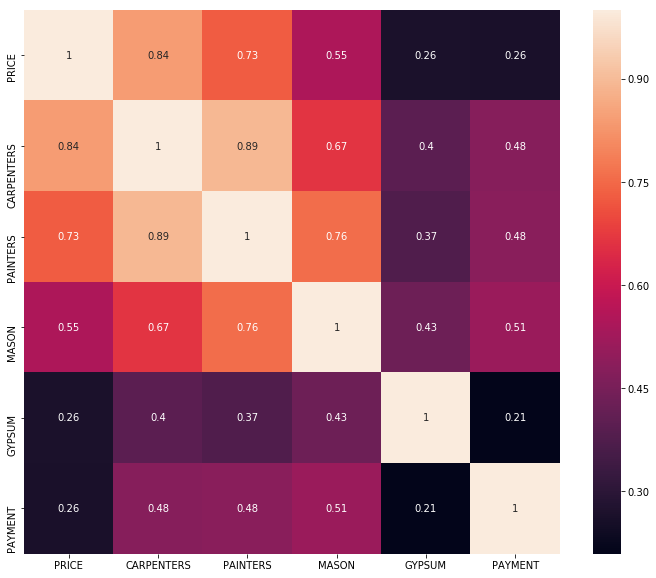

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

### Regression Plot Visualization

In [43]:
X = df['CARPENTERS'].values.reshape(-1, 1)
y = df['PRICE'].values

C:\Users\waqar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


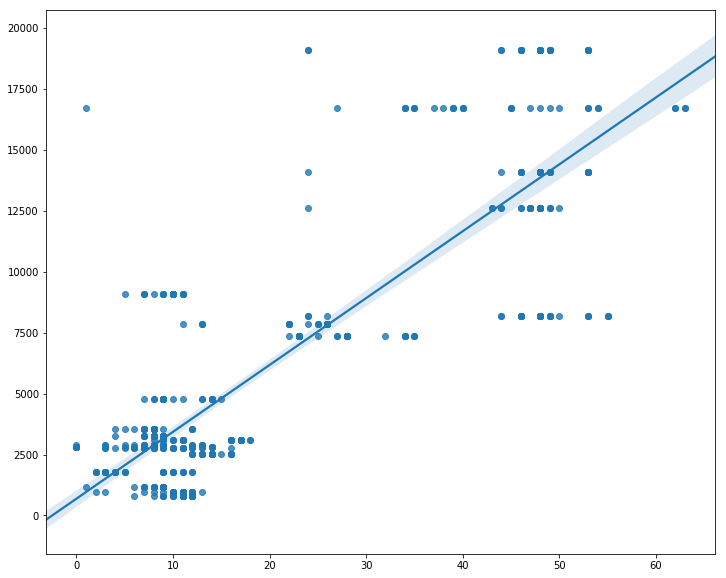

In [45]:
plt.figure(figsize=(12, 10))
sns.regplot(X, y);
plt.show()

### RANSAC Regressor

In [46]:
from sklearn.linear_model import RANSACRegressor

In [47]:
ransac = RANSACRegressor()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [55]:
X_train_pred_mod = model.predict(X_train)

In [56]:
X_train_pred_ran = ransac.predict(X_train)

In [57]:
X_test_pred_mod = model.predict(X_test)

In [58]:
X_test_pred_ran = ransac.predict(X_test)

### Model Performance Analysis

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
mean_squared_error(y_train, X_train_pred_mod)

9027609.58240653

In [61]:
mean_squared_error(y_test, X_test_pred_mod)

6159325.12956042

In [62]:
mean_squared_error(y_train, X_train_pred_ran)

9781021.427052293

In [63]:
mean_squared_error(y_test, X_test_pred_ran)

6407880.367408548

In [64]:
r2_score(y_train, X_train_pred_mod)

0.6929842103087065

In [65]:
r2_score(y_train, X_train_pred_ran)

0.667361776115553

In [66]:
r2_score(y_test, X_test_pred_mod)

0.7568817247716251

In [67]:
r2_score(y_test, X_test_pred_ran)

0.7470708575981093